<center><h1>Poisson Regression Models in R</h1></center>

# 1. Poisson Regression

1. Form of Poisson model for single predictor

$$ \text{log}(\mu) = \beta_0 + \beta_1 x_1 $$ 

2. Link function is $\text{log}(\cdot)$

3. We use Poisson regression when we model count data   % (e.g., $y_i \in \{0, 1, 2, \dots \}$)
  - Number of offspring an individual has
  -  Number bacterial colonies in Petri dish
4. As we saw with logistic regression, we _could_ use a linear model instead (Don't do this). but our parameter estimates would be biased, and our model inaccurate

## 1.1 Poisson Distribution
<center>
<img src=images/poisson_dist.png width = "860">
</center>


## 1.2 Poisson Regression

1. As with linear and logistic regression, we can use Poisson regression to estimate effects of predictors on some outcome

2. We can also use fitted Poisson regression models to predict future values of some outcome variable given known values for the covariates

3. Frequently used for modeling rare events

### 1.2.1 Assumptions of Poisson Regression
1. Log-transformed outcomes are linearly related to predictors 
2. Observations are independent 
3. Distributional assumption:  $y_i | x_i \sim \text{Poisson}(\lambda_i)$

### 1.2.2 Assumptions of Poisson Regression (cont.)

 - Note that the assumption $y_i | x_i \sim \text{Poisson}(\lambda_i)$ has some important implications.

 - The Poisson distribution has a single parameter, $\lambda$, which is both its mean and variance. 

 - It is frequently the case we will have data where the variance greatly exceeds the mean. When this happens, it is wise to consider similar alternatives to the Poisson model    

### 1.2.3 Similar Alternatives to Poisson Models
1. Quasi-Poisson regression
2. Zero-inflated Poisson regression
3. Negative Binomial regression

### 1.2.4 Evaluation of Poisson Regression Models

 - As with logistic regression, there is no direct counterpart to the $R^2$ in linear regression

 - Poisson regression models can be compared using AIC and BIC as we saw with linear and logistic regression

### 1.2.5 Interpreting Poisson Regression Parameters
 - We can exponentiate Poisson regression parameter estimates, and then treat them multiplicative effects

# 2. Poisson Model for Number of Procedures

Suppose we want to model the number of procedure for diabetes patients admitted to the hospital. We use several Poisson models below.

In [2]:
library(tidyverse)

dia_df <- read.csv("data/diabetes_data_clean.csv")


dim(dia_df)        # dimensions of dataframe (i.e., number of rows and columns)
names(dia_df)      # get column names

[1] 101766     50

[1] "encounter_id"             "patient_nbr"             
 [3] "race"                     "gender"                  
 [5] "age"                      "weight"                  
 [7] "admission_type"           "discharge_disposition"   
 [9] "admission_source"         "time_in_hospital"        
[11] "payer_code"               "medical_specialty"       
[13] "num_lab_procedures"       "num_procedures"          
[15] "num_medications"          "number_outpatient"       
[17] "number_emergency"         "number_inpatient"        
[19] "diag_1"                   "diag_2"                  
[21] "diag_3"                   "number_diagnoses"        
[23] "max_glu_serum"            "A1Cresult"               
[25] "metformin"                "repaglinide"             
[27] "nateglinide"              "chlorpropamide"          
[29] "glimepiride"              "acetohexamide"           
[31] "glipizide"                "glyburide"               
[33] "tolbutamide"              "pioglitazone"            
[35] "rosiglitazone"            "acarbose"                
[37] "miglitol"                 "troglitazone"            
[39] "tolazamide"               "examide"                 
[41] "citoglipton"              "insulin"                 
[43] "glyburide_metformin"      "glipizide_metformin"     
[45] "glimepiride_pioglitazone" "metformin_rosiglitazone" 
[47] "metformin_pioglitazone"   "change"                  
[49] "diabetesMed"              "readmitted"

## 2.1 Checking Mean and Variance

- Recall the assumptions of Poisson models

In [3]:
mean(dia_df$num_procedures)
var(dia_df$num_procedures)

[1] 1.33973

[1] 2.909777

## 2.2 Fitting Poisson Regression Model

- As with binomial logistic regression, we use `glm()` function

In [4]:
fm5 <- glm(num_procedures ~ number_diagnoses, dia_df, family = poisson(link = "log"))

In [6]:
library(broom)
tidy(fm5)

glance(fm5)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.08877153,0.01146249,-7.744526,9.593902e-15
number_diagnoses,0.05073237,0.00146474,34.635746,7.322312e-263


null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
220167.2,101765,-182193.9,364391.7,364410.8,218930.4,101764,101766


### 2.2.1 Plotting our Model's Variables

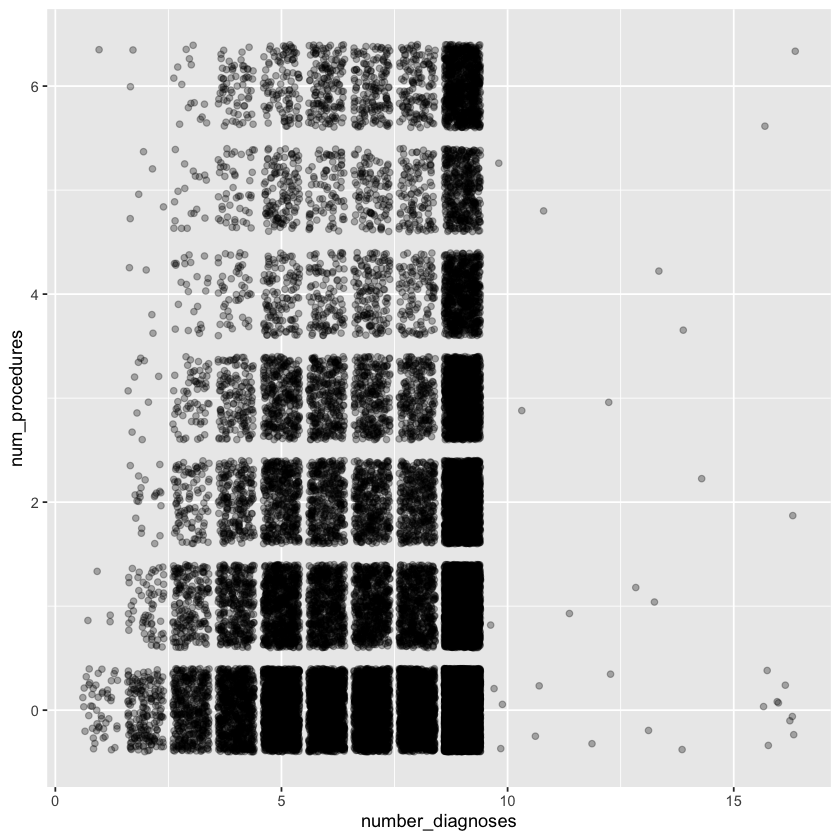

In [12]:
df_dia_subset <- sample_frac(dia_df, 0.3)

ggplot(df_dia_subset, aes(x = number_diagnoses, y = num_procedures)) +
    geom_jitter(alpha = 0.3)

## 2.3 Adding Predictor Variables

- Like linear and logistic regression, we can add arbitrary number of predictors

In [13]:
fm6 <- glm(num_procedures ~ number_diagnoses + num_medications + time_in_hospital, 
           dia_df, 
           family = poisson(link = "log"))

In [14]:
tidy(fm6)
glance(fm6)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.492862068,0.0117377906,-41.989339,0.000000e+00
number_diagnoses,-0.005352674,0.0015156775,-3.531539,4.131496e-04
num_medications,0.043342655,0.0002880113,150.489398,0.000000e+00
time_in_hospital,0.011259141,0.0009644126,11.674610,1.718523e-31


null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
220167.2,101765,-169299.7,338607.3,338645.4,193142,101762,101766


### 2.3.1 Plotting our Variables

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



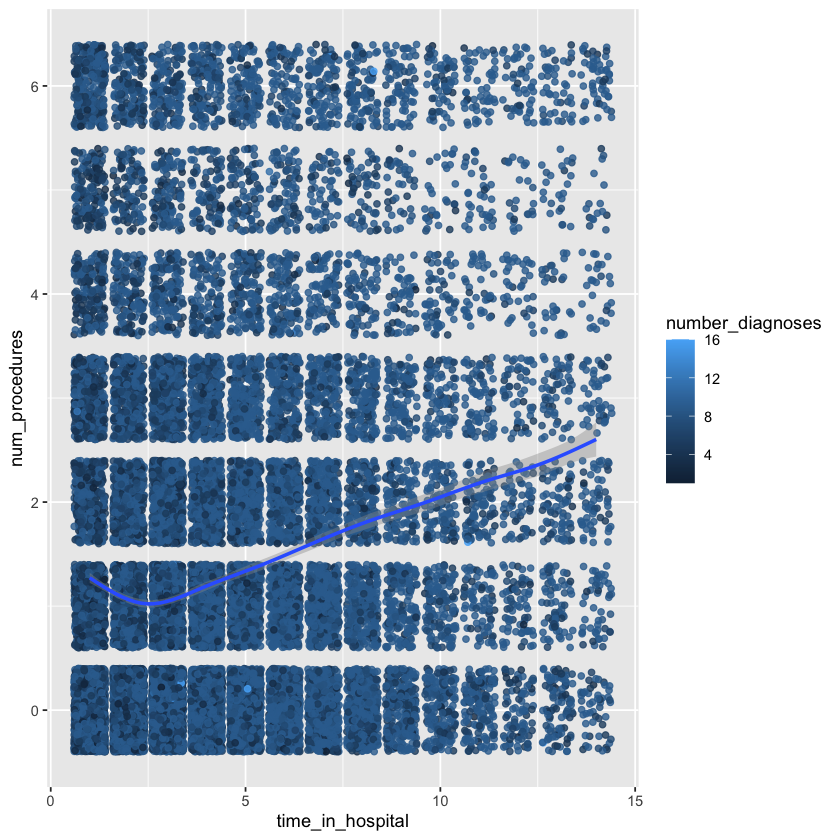

In [16]:
ggplot(df_dia_subset, aes(x = time_in_hospital, y = num_procedures, colour = number_diagnoses)) +
    geom_jitter(alpha = 0.8) + 
    geom_smooth()